<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-6/Act3_6_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.6: Extraccion de Características (Airbnb - Boston)

## Generación y Analisis Inicial del Frame

In [ ]:
#Instalamos la libreria para analisis de variables categoricas
%pip install funpymodeling

In [20]:
#Importamos la libreria pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar un archivo
from google.colab import files
files.upload()

In [22]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

In [23]:
#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [24]:
#Crear DataFrame
data = pd.read_csv('boston_listings_clean.csv',encoding='utf-8')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.00,29.00,29.0,29.00,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.00,1.00,3.0,3.00,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.00,1.00,3.0,2.90,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0
3,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Anne,2009-07-22,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Beacon Hill,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",t,2024-06-22,2014-08-12,2024-05-15,f,2.0,1.0,1.0,2.0,0,0.0,4.69,4.69,4.55,4.93,4.97,4.97,4.59,0.0,0.24,100.0,96.02,42.35867,-71.06307,14.12,13.24,91.0,15.22,1,1,101,3.0,8.0,8.0,0.0,12.0,31.0,92.0,365,29.0,26988,365.0,365.0,365.0
4,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,Michelle,2009-09-16,Host Location unavailable,within a day,f,"['email', 'phone']",t,t,Back Bay,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",t,2024-06-22,2016-01-09,2019-07-22,f,3.0,1.0,0.0,1.0,29,0.0,4.80,4.84,4.67,4.90,4.89,5.00,4.67,0.0,0.09,98.0,96.02,42.35173,-71.08685,14.12,13.24,91.0,15.22,59,89,364,0.0,13.0,13.0,0.0,22.0,29.0,130.0,1125,9.0,38997,1125.0,1125.0,1125.0


In [25]:
#Cantidad de filas y columnas del frame
data.shape

(4325, 61)

In [26]:
#Informacion del frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  4325 non-null   object 
 1   source                                        4325 non-null   object 
 2   name                                          4325 non-null   object 
 3   description                                   4325 non-null   object 
 4   host_name                                     4325 non-null   object 
 5   host_since                                    4325 non-null   object 
 6   host_location                                 4325 non-null   object 
 7   host_response_time                            4325 non-null   object 
 8   host_is_superhost                             4325 non-null   object 
 9   host_verifications                            4325 non-null   o

In [27]:
#Corroborar valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_is_superhost,0
host_verifications,0


En la entrega anterior se llevo a cabo una limpieza exhaustiva de los datos del DataFrame creado a partir de la información de las listings de airbnb en la ciudad de Bostón. Ahora, lo que sigue es realizar la extracción de características de los datos para su posterior comparación con las otras dos ciudades.

Primero, se realizara un analisis univariado de 20 variables categóricas para extraer estas características y mostrar los resultados en gráficas y tablas.

Segundo, se llevara a cabo una categorización de ciertas variables numéricas utilizando la Regla de Sturges para luego mostrar las frecuencias de las categorías de cada variable.

## Variables Categóricas

Para el Análisis Univariado se eliguieron las siguientes 20 variables categóricas: 'last_scraped','source','host_name','host_since','host_location','host_response_time','host_is_superhost','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','room_type','bathrooms_text','amenities','has_availability','calendar_last_scraped','first_review','last_review','instant_bookable'

In [28]:
#Obtengo un analisis univariado de la variable categorica
table1 = freq_tbl(data['last_scraped'])
table1

,last_scraped,frequency,percentage,cumulative_perc
0,2024-06-22,4325,1.0,1.0


In [29]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table1_2 = table1.drop(['percentage','cumulative_perc'],axis=1)
table1_2

,last_scraped,frequency
0,2024-06-22,4325


In [30]:
#Filtrar el frame sobre una frecuencia especifica
filtro1 = table1_2[table1_2['frequency']>1]
filtro1

,last_scraped,frequency
0,2024-06-22,4325


In [31]:
#Establecemos el indice del frame al atributo del dato
filtro_index1 = filtro1.set_index('last_scraped')
filtro_index1

,frequency
last_scraped,
2024-06-22,4325


<Axes: ylabel='frequency'>

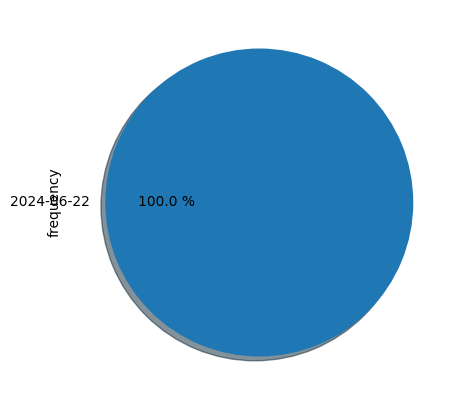

In [32]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index1['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [33]:
#Obtengo un analisis univariado de la variable categorica
table2 = freq_tbl(data['source'])
table2

,source,frequency,percentage,cumulative_perc
0,city scrape,3543,0.819191,0.819191
1,previous scrape,782,0.180809,1.000000


In [34]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table2_2 = table2.drop(['percentage','cumulative_perc'],axis=1)
table2_2

,source,frequency
0,city scrape,3543
1,previous scrape,782


In [35]:
#Filtrar el frame sobre una frecuencia especifica
filtro2 = table2_2[table2_2['frequency']>1]
filtro2

,source,frequency
0,city scrape,3543
1,previous scrape,782


In [36]:
#Establecemos el indice del frame al atributo del dato
filtro_index2 = filtro2.set_index('source')
filtro_index2

,frequency
source,
city scrape,3543
previous scrape,782


<Axes: ylabel='frequency'>

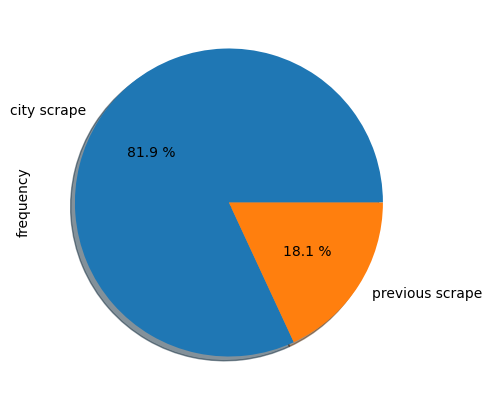

In [37]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index2['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [38]:
#Obtengo un analisis univariado de la variable categorica
table3 = freq_tbl(data['host_name'])
#table3

In [39]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table3_2 = table3.drop(['percentage','cumulative_perc'],axis=1)
#table3_2

In [40]:
#Filtrar el frame sobre una frecuencia especifica
filtro3 = table3_2[table3_2['frequency']>9]
filtro3

,host_name,frequency
0,Blueground,379
1,Sophia,165
2,Healing Homes,134
3,Maverick,87
4,Foster,75
5,Steven,71
6,Adam,65
7,Evonify,62
8,Thatch,53
9,StayNue,51


In [41]:
#Establecemos el indice del frame al atributo del dato
filtro_index3 = filtro3.set_index('host_name')
filtro_index3

,frequency
host_name,
Blueground,379
Sophia,165
Healing Homes,134
Maverick,87
Foster,75
Steven,71
Adam,65
Evonify,62
Thatch,53


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

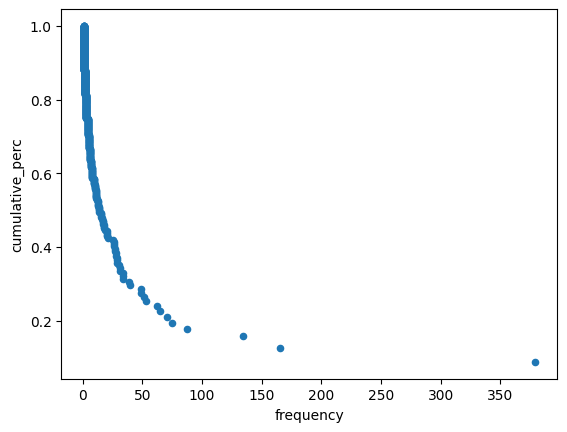

In [42]:
#Realizamos graficos de dispersion del dataframe filtrado
table3.plot('frequency','cumulative_perc',kind='scatter')

In [43]:
#Obtengo un analisis univariado de la variable categorica
table4 = freq_tbl(data['host_since'])
#table4

In [44]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table4_2 = table4.drop(['percentage','cumulative_perc'],axis=1)
#table4_2

In [45]:
#Filtrar el frame sobre una frecuencia especifica
filtro4 = table4_2[table4_2['frequency']>9]
filtro4

,host_since,frequency
0,2016-12-16,379
1,2019-09-25,154
2,2014-10-09,87
3,2020-12-31,75
4,2020-01-27,74
5,2019-07-13,71
6,2017-12-23,64
7,2018-08-29,62
8,2020-08-30,60
9,2011-07-13,53


In [46]:
#Establecemos el indice del frame al atributo del dato
filtro_index4 = filtro4.set_index('host_since')
filtro_index4

,frequency
host_since,
2016-12-16,379
2019-09-25,154
2014-10-09,87
2020-12-31,75
2020-01-27,74
2019-07-13,71
2017-12-23,64
2018-08-29,62
2020-08-30,60


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

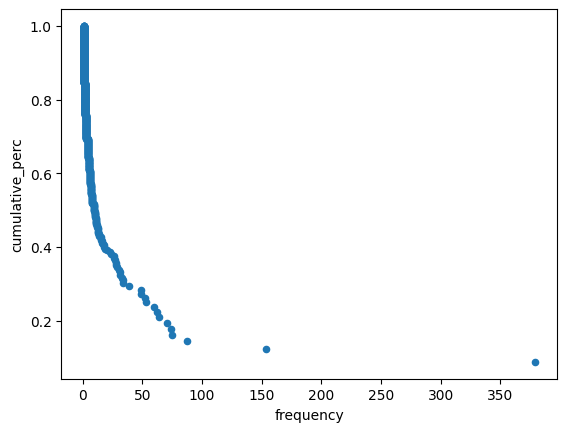

In [47]:
#Realizamos graficos de dispersion del dataframe filtrado
table4.plot('frequency','cumulative_perc',kind='scatter')

In [48]:
#Obtengo un analisis univariado de la variable categorica
table5 = freq_tbl(data['host_location'])
#table5

In [49]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table5_2 = table5.drop(['percentage','cumulative_perc'],axis=1)
#table5_2

In [50]:
#Filtrar el frame sobre una frecuencia especifica
filtro5 = table5_2[table5_2['frequency']>9]
filtro5

,host_location,frequency
0,"Boston, MA",2408
1,Host Location unavailable,977
2,"New York, NY",451
3,"Massachusetts, United States",147
4,"Cambridge, MA",31
5,"Hawthorne, NJ",29
6,"Los Angeles, CA",21
7,"Newton, MA",20
8,"Quincy, MA",17
9,"Brookline, MA",12


In [51]:
#Establecemos el indice del frame al atributo del dato
filtro_index5 = filtro5.set_index('host_location')
filtro_index5

,frequency
host_location,
"Boston, MA",2408
Host Location unavailable,977
"New York, NY",451
"Massachusetts, United States",147
"Cambridge, MA",31
"Hawthorne, NJ",29
"Los Angeles, CA",21
"Newton, MA",20
"Quincy, MA",17


<Axes: xlabel='host_location'>

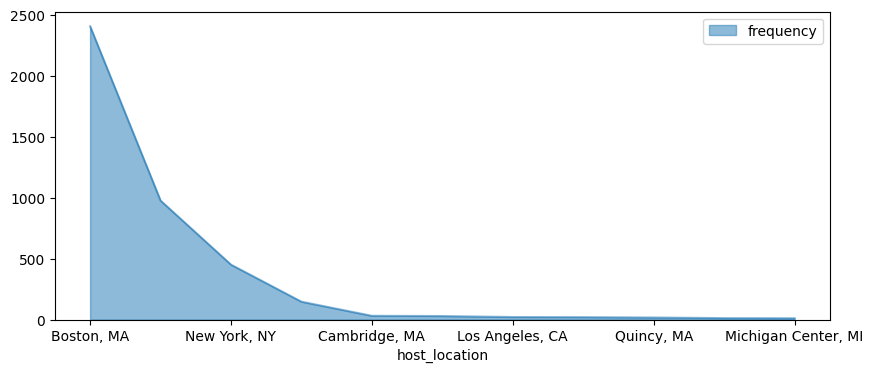

In [52]:
#Realizamos grafico de area del dataframe filtrado
filtro_index5.plot(kind='area',figsize=(10,4),alpha=0.5)

In [53]:
#Obtengo un analisis univariado de la variable categorica
table6 = freq_tbl(data['host_response_time'])
table6

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,3165,0.731792,0.731792
1,Response time unavailable,502,0.116069,0.847861
2,within a day,334,0.077225,0.925087
3,within a few hours,289,0.066821,0.991908
4,a few days or more,35,0.008092,1.000000


In [54]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table6_2 = table6.drop(['percentage','cumulative_perc'],axis=1)
table6_2

,host_response_time,frequency
0,within an hour,3165
1,Response time unavailable,502
2,within a day,334
3,within a few hours,289
4,a few days or more,35


In [55]:
#Filtrar el frame sobre una frecuencia especifica
filtro6 = table6_2[table6_2['frequency']>1]
filtro6

,host_response_time,frequency
0,within an hour,3165
1,Response time unavailable,502
2,within a day,334
3,within a few hours,289
4,a few days or more,35


In [56]:
#Establecemos el indice del frame al atributo del dato
filtro_index6 = filtro6.set_index('host_response_time')
filtro_index6

,frequency
host_response_time,
within an hour,3165
Response time unavailable,502
within a day,334
within a few hours,289
a few days or more,35


<Axes: ylabel='frequency'>

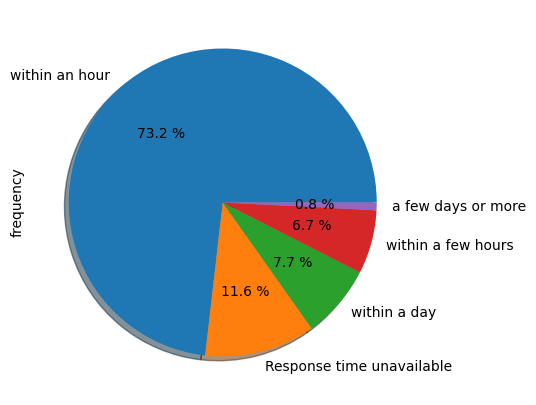

In [57]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index6['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [58]:
#Obtengo un analisis univariado de la variable categorica
table7 = freq_tbl(data['host_is_superhost'])
table7

,host_is_superhost,frequency,percentage,cumulative_perc
0,f,3039,0.702659,0.702659
1,t,1286,0.297341,1.000000


In [59]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table7_2 = table7.drop(['percentage','cumulative_perc'],axis=1)
table7_2

,host_is_superhost,frequency
0,f,3039
1,t,1286


In [60]:
#Filtrar el frame sobre una frecuencia especifica
filtro7 = table7_2[table7_2['frequency']>1]
filtro7

,host_is_superhost,frequency
0,f,3039
1,t,1286


In [61]:
#Establecemos el indice del frame al atributo del dato
filtro_index7 = filtro7.set_index('host_is_superhost')
filtro_index7

,frequency
host_is_superhost,
f,3039
t,1286


<Axes: ylabel='frequency'>

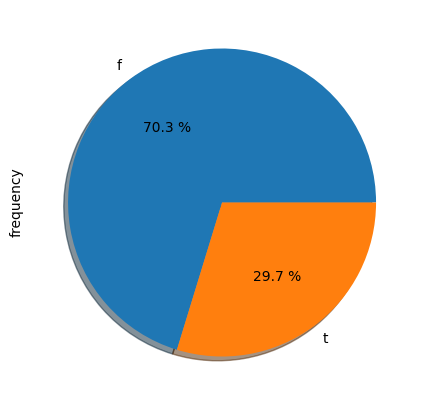

In [62]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index7['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [63]:
#Obtengo un analisis univariado de la variable categorica
table8 = freq_tbl(data['host_verifications'])
table8

,host_verifications,frequency,percentage,cumulative_perc
0,"['email', 'phone']",3099,0.716532,0.716532
1,"['email', 'phone', 'work_email']",889,0.205549,0.922081
2,['phone'],270,0.062428,0.984509
3,"['phone', 'work_email']",65,0.015029,0.999538
4,['email'],2,0.000462,1.000000


In [64]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table8_2 = table8.drop(['percentage','cumulative_perc'],axis=1)
table8_2

,host_verifications,frequency
0,"['email', 'phone']",3099
1,"['email', 'phone', 'work_email']",889
2,['phone'],270
3,"['phone', 'work_email']",65
4,['email'],2


In [65]:
#Filtrar el frame sobre una frecuencia especifica
filtro8 = table8_2[table8_2['frequency']>1]
filtro8

,host_verifications,frequency
0,"['email', 'phone']",3099
1,"['email', 'phone', 'work_email']",889
2,['phone'],270
3,"['phone', 'work_email']",65
4,['email'],2


In [66]:
#Establecemos el indice del frame al atributo del dato
filtro_index8 = filtro8.set_index('host_verifications')
filtro_index8

,frequency
host_verifications,
"['email', 'phone']",3099
"['email', 'phone', 'work_email']",889
['phone'],270
"['phone', 'work_email']",65
['email'],2


<Axes: ylabel='frequency'>

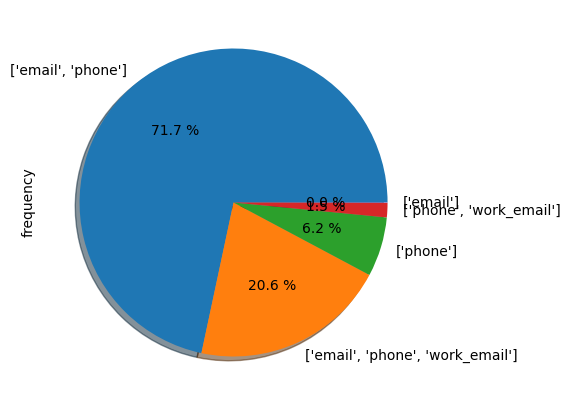

In [67]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index8['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [68]:
#Obtengo un analisis univariado de la variable categorica
table9 = freq_tbl(data['host_has_profile_pic'])
table9

,host_has_profile_pic,frequency,percentage,cumulative_perc
0,t,4284,0.99052,0.99052
1,f,41,0.00948,1.00000


In [69]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table9_2 = table9.drop(['percentage','cumulative_perc'],axis=1)
table9_2

,host_has_profile_pic,frequency
0,t,4284
1,f,41


In [70]:
#Filtrar el frame sobre una frecuencia especifica
filtro9 = table9_2[table9_2['frequency']>1]
filtro9

,host_has_profile_pic,frequency
0,t,4284
1,f,41


In [71]:
#Establecemos el indice del frame al atributo del dato
filtro_index9 = filtro9.set_index('host_has_profile_pic')
filtro_index9

,frequency
host_has_profile_pic,
t,4284
f,41


<Axes: ylabel='frequency'>

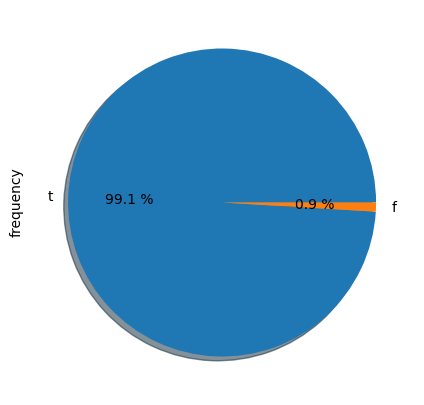

In [72]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index9['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [73]:
#Obtengo un analisis univariado de la variable categorica
table10 = freq_tbl(data['host_identity_verified'])
table10

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,3897,0.90104,0.90104
1,f,428,0.09896,1.00000


In [74]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table10_2 = table10.drop(['percentage','cumulative_perc'],axis=1)
table10_2

,host_identity_verified,frequency
0,t,3897
1,f,428


In [75]:
#Filtrar el frame sobre una frecuencia especifica
filtro10 = table10_2[table10_2['frequency']>1]
filtro10

,host_identity_verified,frequency
0,t,3897
1,f,428


In [76]:
#Establecemos el indice del frame al atributo del dato
filtro_index10 = filtro10.set_index('host_identity_verified')
filtro_index10

,frequency
host_identity_verified,
t,3897
f,428


<Axes: ylabel='frequency'>

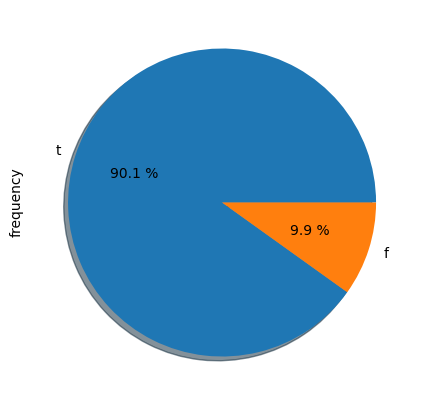

In [77]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index10['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [78]:
#Obtengo un analisis univariado de la variable categorica
table11 = freq_tbl(data['neighbourhood_cleansed'])
table11

,neighbourhood_cleansed,frequency,percentage,cumulative_perc
0,Dorchester,545,0.126012,0.126012
1,Downtown,374,0.086474,0.212486
2,Back Bay,371,0.085780,0.298266
3,South End,317,0.073295,0.371561
4,Brighton,314,0.072601,0.444162
5,Roxbury,310,0.071676,0.515838
6,Fenway,255,0.058960,0.574798
7,Jamaica Plain,220,0.050867,0.625665
8,South Boston,199,0.046012,0.671676
9,East Boston,198,0.045780,0.717457


In [79]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table11_2 = table11.drop(['percentage','cumulative_perc'],axis=1)
table11_2

,neighbourhood_cleansed,frequency
0,Dorchester,545
1,Downtown,374
2,Back Bay,371
3,South End,317
4,Brighton,314
5,Roxbury,310
6,Fenway,255
7,Jamaica Plain,220
8,South Boston,199
9,East Boston,198


In [80]:
#Filtrar el frame sobre una frecuencia especifica
filtro11 = table11_2[table11_2['frequency']>1]
filtro11

,neighbourhood_cleansed,frequency
0,Dorchester,545
1,Downtown,374
2,Back Bay,371
3,South End,317
4,Brighton,314
5,Roxbury,310
6,Fenway,255
7,Jamaica Plain,220
8,South Boston,199
9,East Boston,198


In [81]:
#Establecemos el indice del frame al atributo del dato
filtro_index11 = filtro11.set_index('neighbourhood_cleansed')
filtro_index11

,frequency
neighbourhood_cleansed,
Dorchester,545
Downtown,374
Back Bay,371
South End,317
Brighton,314
Roxbury,310
Fenway,255
Jamaica Plain,220
South Boston,199


Text(0, 0.5, 'Frequency')

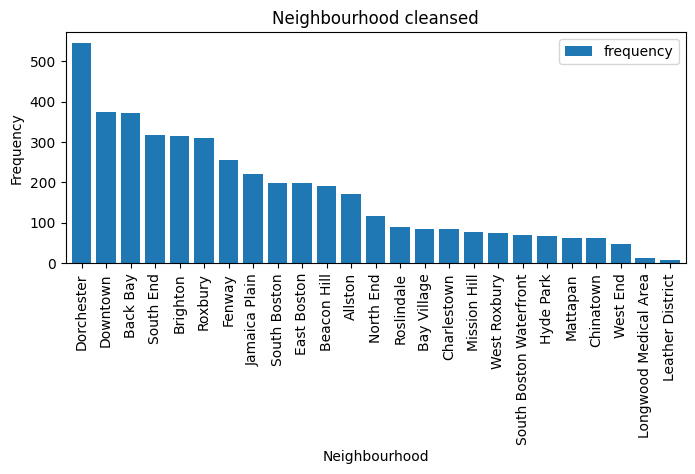

In [82]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index11.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Neighbourhood cleansed')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')

In [83]:
#Obtengo un analisis univariado de la variable categorica
table12 = freq_tbl(data['property_type'])
table12

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,2135,0.493642,0.493642
1,Private room in rental unit,651,0.150520,0.644162
2,Private room in home,355,0.082081,0.726243
3,Entire condo,321,0.074220,0.800462
4,Entire home,196,0.045318,0.845780
5,Entire serviced apartment,141,0.032601,0.878382
6,Room in hotel,108,0.024971,0.903353
7,Private room in condo,83,0.019191,0.922543
8,Entire guest suite,61,0.014104,0.936647
9,Entire townhouse,43,0.009942,0.946590


In [84]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table12_2 = table12.drop(['percentage','cumulative_perc'],axis=1)
table12_2

,property_type,frequency
0,Entire rental unit,2135
1,Private room in rental unit,651
2,Private room in home,355
3,Entire condo,321
4,Entire home,196
5,Entire serviced apartment,141
6,Room in hotel,108
7,Private room in condo,83
8,Entire guest suite,61
9,Entire townhouse,43


In [85]:
#Filtrar el frame sobre una frecuencia especifica
filtro12 = table12_2[table12_2['frequency']>0] #Sin Filtro
#filtro12

In [86]:
#Establecemos el indice del frame al atributo del dato
filtro_index12 = filtro12.set_index('property_type')
filtro_index12

,frequency
property_type,
Entire rental unit,2135
Private room in rental unit,651
Private room in home,355
Entire condo,321
Entire home,196
Entire serviced apartment,141
Room in hotel,108
Private room in condo,83
Entire guest suite,61


<Axes: xlabel='property_type'>

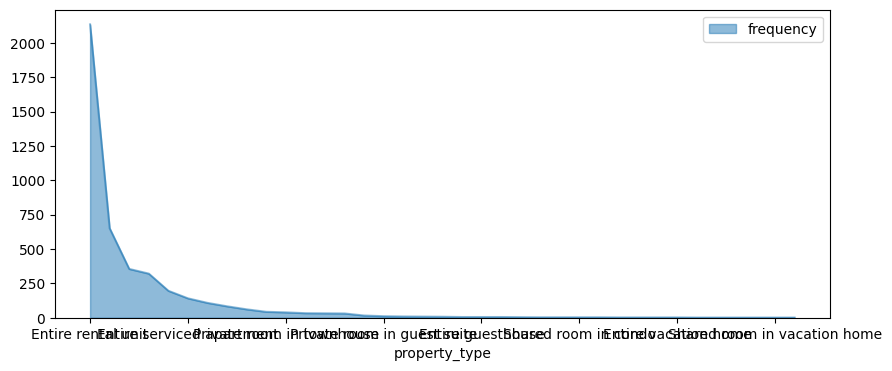

In [87]:
#Realizamos grafico de area del dataframe filtrado
filtro_index12.plot(kind='area',figsize=(10,4),alpha=0.5)

In [88]:
#Obtengo un analisis univariado de la variable categorica
table13 = freq_tbl(data['room_type'])
table13

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,2950,0.682081,0.682081
1,Private room,1313,0.303584,0.985665
2,Hotel room,43,0.009942,0.995607
3,Shared room,19,0.004393,1.000000


In [89]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table13_2 = table13.drop(['percentage','cumulative_perc'],axis=1)
table13_2

,room_type,frequency
0,Entire home/apt,2950
1,Private room,1313
2,Hotel room,43
3,Shared room,19


In [90]:
#Filtrar el frame sobre una frecuencia especifica
filtro13 = table13_2[table13_2['frequency']>1]
filtro13

,room_type,frequency
0,Entire home/apt,2950
1,Private room,1313
2,Hotel room,43
3,Shared room,19


In [91]:
#Establecemos el indice del frame al atributo del dato
filtro_index13 = filtro13.set_index('room_type')
filtro_index13

,frequency
room_type,
Entire home/apt,2950
Private room,1313
Hotel room,43
Shared room,19


<Axes: ylabel='frequency'>

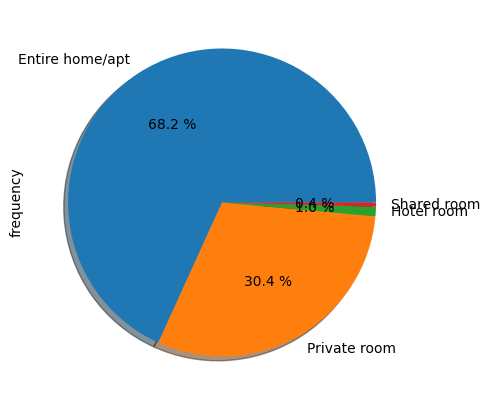

In [92]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index13['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [93]:
#Obtengo un analisis univariado de la variable categorica
table14 = freq_tbl(data['bathrooms_text'])
table14

,bathrooms_text,frequency,percentage,cumulative_perc
0,1 bath,2356,0.544740,0.544740
1,2 baths,570,0.131792,0.676532
2,1 shared bath,450,0.104046,0.780578
3,1 private bath,207,0.047861,0.828439
4,1.5 baths,154,0.035607,0.864046
5,2 shared baths,149,0.034451,0.898497
6,0 shared baths,149,0.034451,0.932948
7,1.5 shared baths,80,0.018497,0.951445
8,2.5 baths,78,0.018035,0.969480
9,3 baths,54,0.012486,0.981965


In [94]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table14_2 = table14.drop(['percentage','cumulative_perc'],axis=1)
table14_2

,bathrooms_text,frequency
0,1 bath,2356
1,2 baths,570
2,1 shared bath,450
3,1 private bath,207
4,1.5 baths,154
5,2 shared baths,149
6,0 shared baths,149
7,1.5 shared baths,80
8,2.5 baths,78
9,3 baths,54


In [95]:
#Filtrar el frame sobre una frecuencia especifica
filtro14 = table14_2[table14_2['frequency']>0] #Sin Filtro
#filtro1

In [96]:
#Establecemos el indice del frame al atributo del dato
filtro_index14 = filtro14.set_index('bathrooms_text')
filtro_index14

,frequency
bathrooms_text,
1 bath,2356
2 baths,570
1 shared bath,450
1 private bath,207
1.5 baths,154
2 shared baths,149
0 shared baths,149
1.5 shared baths,80
2.5 baths,78


<Axes: xlabel='bathrooms_text'>

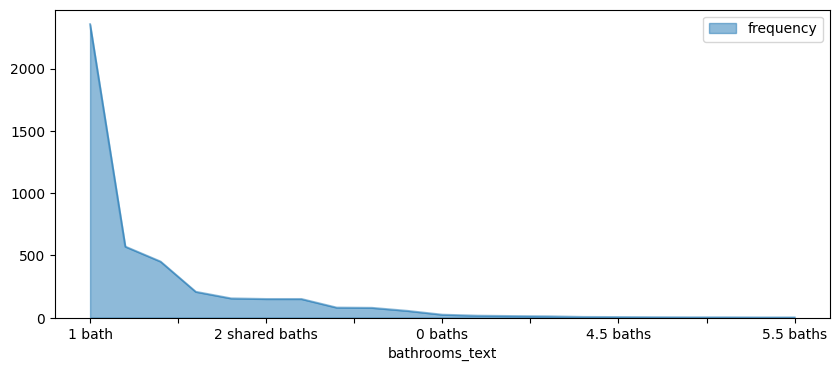

In [97]:
#Realizamos grafico de area del dataframe filtrado
filtro_index14.plot(kind='area',figsize=(10,4),alpha=0.5)

In [98]:
#Obtengo un analisis univariado de la variable categorica
table15 = freq_tbl(data['amenities'])
#table15

In [99]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table15_2 = table15.drop(['percentage','cumulative_perc'],axis=1)
#table15_2

In [100]:
#Filtrar el frame sobre una frecuencia especifica
filtro15 = table15_2[table15_2['frequency']>2]
filtro15

,amenities,frequency
0,"[""Gym"", ""Dishwasher"", ""Bed linens"", ""Long term...",35
1,"[""Gym"", ""Fire extinguisher"", ""Bed linens"", ""Ca...",30
2,"[""Fire extinguisher"", ""Bed linens"", ""Carbon mo...",20
3,"[""Bed linens"", ""Clothing storage"", ""Carbon mon...",19
4,"[""Gym"", ""Dishwasher"", ""Bed linens"", ""Long term...",18
5,"[""Smoke alarm"", ""Cooking basics"", ""Dedicated w...",18
6,"[""Coffee maker"", ""Smoke alarm"", ""Shampoo"", ""Co...",16
7,"[""Gym"", ""Dishwasher"", ""Bed linens"", ""Long term...",16
8,"[""Fire extinguisher"", ""Dishwasher"", ""Bed linen...",15
9,"[""Fire extinguisher"", ""Bed linens"", ""Carbon mo...",14


In [101]:
#Establecemos el indice del frame al atributo del dato
filtro_index15 = filtro15.set_index('amenities')
filtro_index15

,frequency
amenities,
"[""Gym"", ""Dishwasher"", ""Bed linens"", ""Long term stays allowed"", ""Elevator"", ""Carbon monoxide alarm"", ""Self check-in"", ""Coffee maker"", ""Cooking basics"", ""Hot water"", ""Air conditioning"", ""Bathtub"", ""Microwave"", ""Kitchen"", ""Shampoo"", ""Washer \u2013\u00a0In unit"", ""Essentials"", ""Hangers"", ""Oven"", ""Dryer \u2013\u00a0In unit"", ""Lockbox"", ""Smoke alarm"", ""High chair"", ""TV"", ""Wifi"", ""Private entrance"", ""Refrigerator"", ""Pets allowed"", ""Heating"", ""Hair dryer"", ""Iron"", ""Crib""]",35
"[""Gym"", ""Fire extinguisher"", ""Bed linens"", ""Carbon monoxide alarm"", ""Self check-in"", ""Coffee maker"", ""Dedicated workspace"", ""Paid parking on premises"", ""Hot water"", ""Air conditioning"", ""Shampoo"", ""Hangers"", ""Essentials"", ""First aid kit"", ""Patio or balcony"", ""Building staff"", ""Smoke alarm"", ""TV"", ""Wifi"", ""Pets allowed"", ""Heating""]",30
"[""Fire extinguisher"", ""Bed linens"", ""Carbon monoxide alarm"", ""Self check-in"", ""Coffee maker"", ""Cooking basics"", ""Dedicated workspace"", ""Hot water"", ""Air conditioning"", ""Microwave"", ""Shampoo"", ""Essentials"", ""Hangers"", ""First aid kit"", ""Dryer"", ""Dishes and silverware"", ""Keypad"", ""Smoke alarm"", ""TV"", ""Wifi"", ""Refrigerator"", ""Heating"", ""Hair dryer"", ""Iron"", ""Washer""]",20
"[""Bed linens"", ""Clothing storage"", ""Carbon monoxide alarm"", ""Dining table"", ""Coffee maker"", ""Cooking basics"", ""Dedicated workspace"", ""Hot water"", ""Air conditioning"", ""Body soap"", ""Conditioner"", ""Kitchen"", ""Cleaning products"", ""Shampoo"", ""Essentials"", ""Hangers"", ""Dishes and silverware"", ""Shower gel"", ""Smoke alarm"", ""Paid washer \u2013 In building"", ""Paid dryer \u2013 In building"", ""TV"", ""Central heating"", ""Wifi"", ""Private entrance"", ""Refrigerator"", ""Stove""]",19
"[""Gym"", ""Dishwasher"", ""Bed linens"", ""Long term stays allowed"", ""Elevator"", ""Carbon monoxide alarm"", ""Self check-in"", ""Coffee maker"", ""Cooking basics"", ""Paid parking on premises"", ""Hot water"", ""Air conditioning"", ""Microwave"", ""Kitchen"", ""Shampoo"", ""Washer \u2013\u00a0In unit"", ""Essentials"", ""Hangers"", ""Oven"", ""Dryer \u2013\u00a0In unit"", ""Lockbox"", ""Smoke alarm"", ""High chair"", ""TV"", ""Wifi"", ""Private entrance"", ""Refrigerator"", ""Pets allowed"", ""Heating"", ""Hair dryer"", ""Iron"", ""Crib""]",18
"[""Smoke alarm"", ""Cooking basics"", ""Dedicated workspace"", ""Oven"", ""TV"", ""Wifi"", ""Lockbox"", ""Hot water"", ""Dishes and silverware"", ""Free street parking"", ""Dishwasher"", ""Heating"", ""Carbon monoxide alarm"", ""Microwave"", ""Self check-in""]",18
"[""Coffee maker"", ""Smoke alarm"", ""Shampoo"", ""Cooking basics"", ""Essentials"", ""TV"", ""Kitchenette"", ""Wifi"", ""Smart lock"", ""Fire extinguisher"", ""Hot water"", ""Air conditioning"", ""Body soap"", ""Bed linens"", ""Pets allowed"", ""Long term stays allowed"", ""Heating"", ""Carbon monoxide alarm"", ""Hair dryer"", ""Self check-in""]",16
"[""Gym"", ""Dishwasher"", ""Bed linens"", ""Long term stays allowed"", ""Elevator"", ""Carbon monoxide alarm"", ""Self check-in"", ""Coffee maker"", ""Cooking basics"", ""Hot water"", ""Air conditioning"", ""Microwave"", ""Kitchen"", ""Shampoo"", ""Washer \u2013\u00a0In unit"", ""Essentials"", ""Hangers"", ""Oven"", ""Dryer \u2013\u00a0In unit"", ""Lockbox"", ""Smoke alarm"", ""High chair"", ""TV"", ""Wifi"", ""Private entrance"", ""Refrigerator"", ""Pets allowed"", ""Heating"", ""Hair dryer"", ""Iron"", ""Crib""]",16
"[""Fire extinguisher"", ""Dishwasher"", ""Bed linens"", ""Long term stays allowed"", ""Carbon monoxide alarm"", ""Self check-in"", ""Coffee maker"", ""Cooking basics"", ""Hot water"", ""Air conditioning"", ""Microwave"", ""Kitchen"", ""Shampoo"", ""Hangers"", ""Essentials"", ""First aid kit"", ""Oven"", ""Dishes and silverware"", ""Keypad"", ""Smoke alarm"", ""TV"", ""Wifi"", ""Refrigerator"", ""Stove"", ""Heating""

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

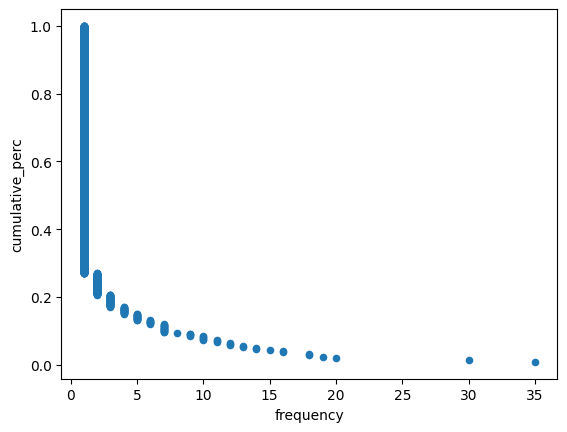

In [102]:
#Realizamos graficos de dispersion del dataframe filtrado
table15.plot('frequency','cumulative_perc',kind='scatter')

In [103]:
#Obtengo un analisis univariado de la variable categorica
table16 = freq_tbl(data['has_availability'])
table16

,has_availability,frequency,percentage,cumulative_perc
0,t,4319,0.998613,0.998613
1,f,6,0.001387,1.000000


In [104]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table16_2 = table16.drop(['percentage','cumulative_perc'],axis=1)
table16_2

,has_availability,frequency
0,t,4319
1,f,6


In [105]:
#Filtrar el frame sobre una frecuencia especifica
filtro16 = table16_2[table16_2['frequency']>1]
filtro16

,has_availability,frequency
0,t,4319
1,f,6


In [106]:
#Establecemos el indice del frame al atributo del dato
filtro_index16 = filtro16.set_index('has_availability')
filtro_index16

,frequency
has_availability,
t,4319
f,6


<Axes: ylabel='frequency'>

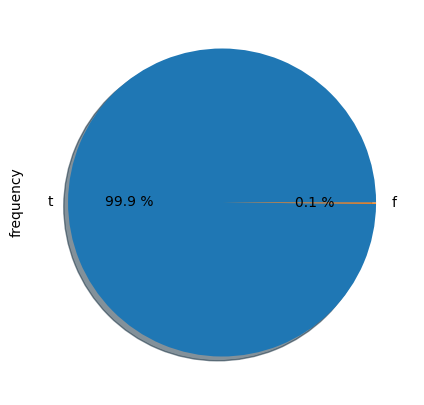

In [107]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index16['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [108]:
#Obtengo un analisis univariado de la variable categorica
table17 = freq_tbl(data['calendar_last_scraped'])
table17

,calendar_last_scraped,frequency,percentage,cumulative_perc
0,2024-06-22,4325,1.0,1.0


In [109]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table17_2 = table17.drop(['percentage','cumulative_perc'],axis=1)
table17_2

,calendar_last_scraped,frequency
0,2024-06-22,4325


In [110]:
#Filtrar el frame sobre una frecuencia especifica
filtro17 = table17_2[table17_2['frequency']>1]
filtro17

,calendar_last_scraped,frequency
0,2024-06-22,4325


In [111]:
#Establecemos el indice del frame al atributo del dato
filtro_index17 = filtro17.set_index('calendar_last_scraped')
filtro_index17

,frequency
calendar_last_scraped,
2024-06-22,4325


<Axes: ylabel='frequency'>

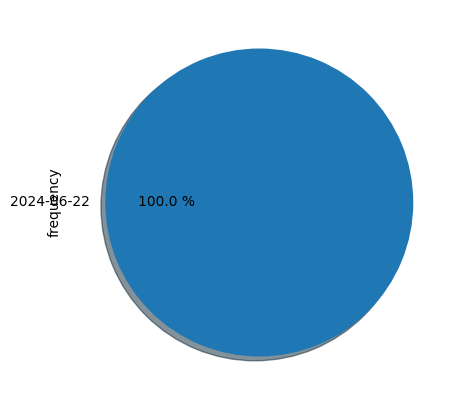

In [112]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index17['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [113]:
#Obtengo un analisis univariado de la variable categorica
table18 = freq_tbl(data['first_review'])
#table18

In [114]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table18_2 = table18.drop(['percentage','cumulative_perc'],axis=1)
#table18_2

In [115]:
#Filtrar el frame sobre una frecuencia especifica
filtro18 = table18_2[table18_2['frequency']>4]
filtro18

,first_review,frequency
0,2030-12-31,999
1,2024-01-01,19
2,2022-09-05,15
3,2023-12-10,11
4,2023-04-18,10
5,2024-03-03,9
6,2024-02-17,9
7,2023-11-19,9
8,2023-12-17,9
9,2023-12-22,9


In [116]:
#Establecemos el indice del frame al atributo del dato
filtro_index18 = filtro18.set_index('first_review')
filtro_index18

,frequency
first_review,
2030-12-31,999
2024-01-01,19
2022-09-05,15
2023-12-10,11
2023-04-18,10
2024-03-03,9
2024-02-17,9
2023-11-19,9
2023-12-17,9


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

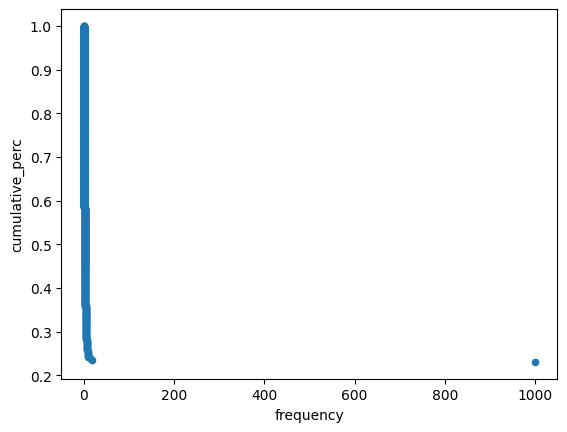

In [117]:
#Realizamos graficos de dispersion del dataframe filtrado
table18.plot('frequency','cumulative_perc',kind='scatter')

In [118]:
#Obtengo un analisis univariado de la variable categorica
table19 = freq_tbl(data['last_review'])
#table19

In [119]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table19_2 = table19.drop(['percentage','cumulative_perc'],axis=1)
#table19_2

In [120]:
#Filtrar el frame sobre una frecuencia especifica
filtro19 = table19_2[table19_2['frequency']>3]
filtro19

,last_review,frequency
0,2030-12-31,999
1,2024-06-16,124
2,2024-06-02,107
3,2024-06-07,101
4,2024-06-17,98
5,2024-06-06,78
6,2024-06-15,76
7,2024-06-18,67
8,2024-06-01,63
9,2024-06-19,62


In [121]:
#Establecemos el indice del frame al atributo del dato
filtro_index19 = filtro19.set_index('last_review')
filtro_index19

,frequency
last_review,
2030-12-31,999
2024-06-16,124
2024-06-02,107
2024-06-07,101
2024-06-17,98
2024-06-06,78
2024-06-15,76
2024-06-18,67
2024-06-01,63


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

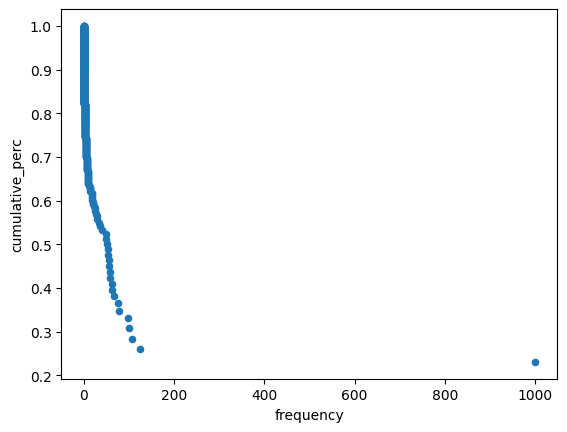

In [122]:
#Realizamos graficos de dispersion del dataframe filtrado
table19.plot('frequency','cumulative_perc',kind='scatter')

In [123]:
#Obtengo un analisis univariado de la variable categorica
table20 = freq_tbl(data['instant_bookable'])
table20

,instant_bookable,frequency,percentage,cumulative_perc
0,f,2727,0.63052,0.63052
1,t,1598,0.36948,1.00000


In [124]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table20_2 = table20.drop(['percentage','cumulative_perc'],axis=1)
table20_2

,instant_bookable,frequency
0,f,2727
1,t,1598


In [125]:
#Filtrar el frame sobre una frecuencia especifica
filtro20 = table20_2[table20_2['frequency']>1]
filtro20

,instant_bookable,frequency
0,f,2727
1,t,1598


In [126]:
#Establecemos el indice del frame al atributo del dato
filtro_index20 = filtro20.set_index('instant_bookable')
filtro_index20

,frequency
instant_bookable,
f,2727
t,1598


<Axes: ylabel='frequency'>

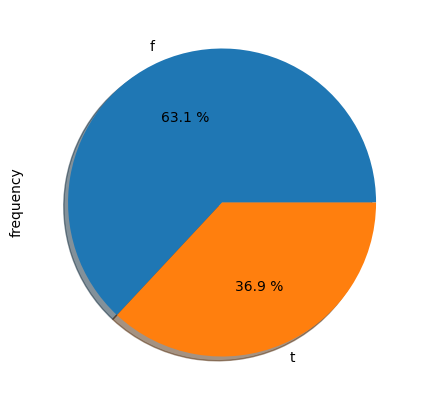

In [127]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index20['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

A lo largo de las 20 variables se realizo un analisis respecto a la cantidad de datos únicos y sus frecuencias en la base de datos. Para evitar saturar de información las gráficas para la comparación, se eligieron los filtros sobre los cuáles se conservaban los datos, dichos filtros se eligieron respecto a la cantidad de frecuencias repetidas que tiene en contraste con los datos más significativos.

## Variables Numéricas

Para el análisis de variables numéricas se asigno realizar la categorización de los siguientes atributos:  

"host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month”

Dichas variables seran sometidas a la Regla de Struger para la obtención y graficación de sus frecuencias.

In [128]:
data.head(3)

,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


In [129]:
#Se crea una copia del frame para la categorizacion
data1 = data.copy()

Utilizando el valor maximo de cada variable, se realizan los cálculos necesarios para aplicar la Regla de Struger, establecer las categorías y obtener las frecuencias.

In [130]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max1 = data['host_response_rate'].max()
min1 = data['host_response_rate'].min()
limites1 = [min1,max1]
limites1

[95.0, 100.0]

In [131]:
#Calculamos el rango R
r1 = max1-min1
r1

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni1 = 1+3.32*np.log10(max1)
ni1

#Calcilamos el ancho del intervao 'i'
i1 = r1/ni1
i1

ni1

7.64

In [132]:
#Categorización de variables
intervalos1 = np.linspace(95.0,100.0,8)
intervalos1

array([ 95.        ,  95.71428571,  96.42857143,  97.14285714,
        97.85714286,  98.57142857,  99.28571429, 100.        ])

In [133]:
#Creamos las categorias
categorias1 = ['Extremely_Slow','Too_Slow','Slow','Neutral','Fast','Too_Fast','Extremely_Fast']

#Creamos las categorias en la columna numerica
data1['host_response_rate'] = pd.cut(x=data['host_response_rate'], bins=intervalos1, labels=categorias1)
data1['host_response_rate'].head(5)

,host_response_rate
0,Extremely_Fast
1,Extremely_Fast
2,Extremely_Fast
3,Extremely_Fast
4,Fast


In [134]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table1 = freq_tbl(data1['host_response_rate'])
table1

,host_response_rate,frequency,percentage,cumulative_perc
0,Extremely_Fast,3469,0.802081,0.810135
1,Slow,556,0.128555,0.939981
2,Too_Fast,118,0.027283,0.967539
3,Fast,112,0.025896,0.993695
4,Too_Slow,27,0.006243,1.000000
5,Extremely_Slow,0,0.000000,1.000000
6,Neutral,0,0.000000,1.000000


In [135]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table1_2 = table1.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro1 = table1_2[table1_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index1 = filtro1.set_index('host_response_rate')
filtro_index1

,frequency
host_response_rate,
Extremely_Fast,3469
Slow,556
Too_Fast,118
Fast,112
Too_Slow,27


Text(0, 0.5, 'Frequency')

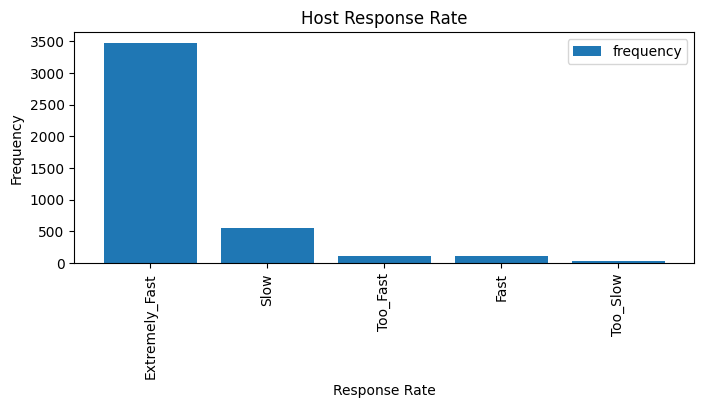

In [136]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index1.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Response Rate')
plt.xlabel('Response Rate')
plt.ylabel('Frequency')

In [137]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max2 = data['host_acceptance_rate'].max()
min2 = data['host_acceptance_rate'].min()
limites2 = [min2,max2]
limites2

[78.0, 100.0]

In [138]:
#Calculamos el rango R
r2 = max2-min2
r2

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni2 = 1+3.32*np.log10(max2)
ni2

#Calcilamos el ancho del intervao 'i'
i2 = r2/ni2
i2

ni2

7.64

In [139]:
#Categorización de variables
intervalos2 = np.linspace(78.0,100.0,8)
intervalos2

array([ 78.        ,  81.14285714,  84.28571429,  87.42857143,
        90.57142857,  93.71428571,  96.85714286, 100.        ])

In [140]:
#Creamos las categorias
categorias2 = ['High_Rejection','Low_Rejection','Little_Rejection','Neutral','Little_Acceptance','Low_Acceptance','High_Acceptance']

#Creamos las categorias en la columna numerica
data1['host_acceptance_rate'] = pd.cut(x=data['host_acceptance_rate'], bins=intervalos2, labels=categorias2)
data1['host_acceptance_rate'].head(5)

,host_acceptance_rate
0,Low_Acceptance
1,High_Acceptance
2,High_Acceptance
3,Low_Acceptance
4,Low_Acceptance


In [141]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table2 = freq_tbl(data1['host_acceptance_rate'])
table2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,High_Acceptance,2510,0.580347,0.582502
1,Low_Acceptance,697,0.161156,0.744256
2,Little_Acceptance,640,0.147977,0.892783
3,Neutral,299,0.069133,0.962172
4,Low_Rejection,67,0.015491,0.977721
5,Little_Rejection,67,0.015491,0.993270
6,High_Rejection,29,0.006705,1.000000


In [142]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table2_2 = table2.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro2 = table2_2[table2_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index2 = filtro2.set_index('host_acceptance_rate')
filtro_index2

,frequency
host_acceptance_rate,
High_Acceptance,2510
Low_Acceptance,697
Little_Acceptance,640
Neutral,299
Low_Rejection,67
Little_Rejection,67
High_Rejection,29


Text(0, 0.5, 'Frequency')

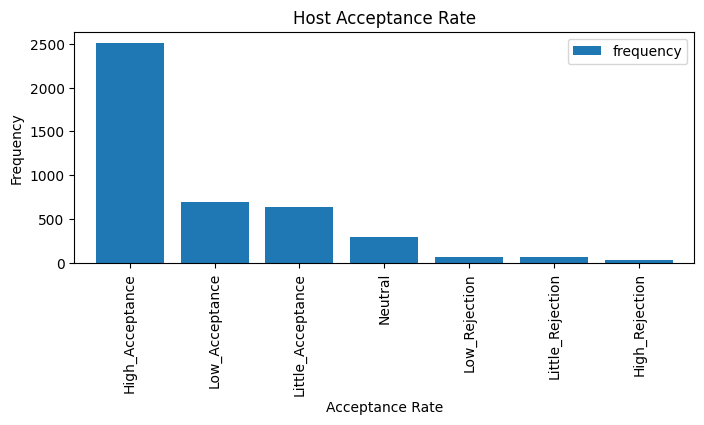

In [143]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index2.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Frequency')

In [144]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max3 = data['host_total_listings_count'].max()
min3 = data['host_total_listings_count'].min()
limites3 = [min3,max3]
limites3

[1.0, 298.0]

In [145]:
#Calculamos el rango R
r3 = max3-min3
r3

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni3 = 1+3.32*np.log10(max3)
ni3

#Calcilamos el ancho del intervao 'i'
i3 = r3/ni3
i3

ni3

9.214397996733167

In [146]:
#Categorización de variables
intervalos3 = np.linspace(1.0,298.0,9)
intervalos3

array([  1.   ,  38.125,  75.25 , 112.375, 149.5  , 186.625, 223.75 ,
       260.875, 298.   ])

In [147]:
#Creamos las categorias
categorias3 = ['Extremely_Few_Count','Very_Few_Count','Few_Count','Small_Count','Good_Count','Good_Amount_Count','Really_Good_Count','Extremely_Good_Count']

#Creamos las categorias en la columna numerica
data1['host_total_listings_count'] = pd.cut(x=data['host_total_listings_count'], bins=intervalos3, labels=categorias3)
data1['host_total_listings_count'].head(5)

,host_total_listings_count
0,Extremely_Few_Count
1,Extremely_Few_Count
2,Extremely_Few_Count
3,Extremely_Few_Count
4,Extremely_Few_Count


In [150]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table3 = freq_tbl(data1['host_total_listings_count'])
table3

,host_total_listings_count,frequency,percentage,cumulative_perc
0,Extremely_Few_Count,2085,0.482081,0.546241
1,Very_Few_Count,1064,0.246012,0.824993
2,Small_Count,308,0.071214,0.905685
3,Good_Count,123,0.028439,0.937909
4,Few_Count,120,0.027746,0.969348
5,Good_Amount_Count,62,0.014335,0.985591
6,Extremely_Good_Count,55,0.012717,1.000000
7,Really_Good_Count,0,0.000000,1.000000


In [152]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table3_2 = table3.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro3 = table3_2[table3_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index3 = filtro3.set_index('host_total_listings_count')
filtro_index3

,frequency
host_total_listings_count,
Extremely_Few_Count,2085
Very_Few_Count,1064
Small_Count,308
Good_Count,123
Few_Count,120
Good_Amount_Count,62
Extremely_Good_Count,55


Text(0, 0.5, 'Frequency')

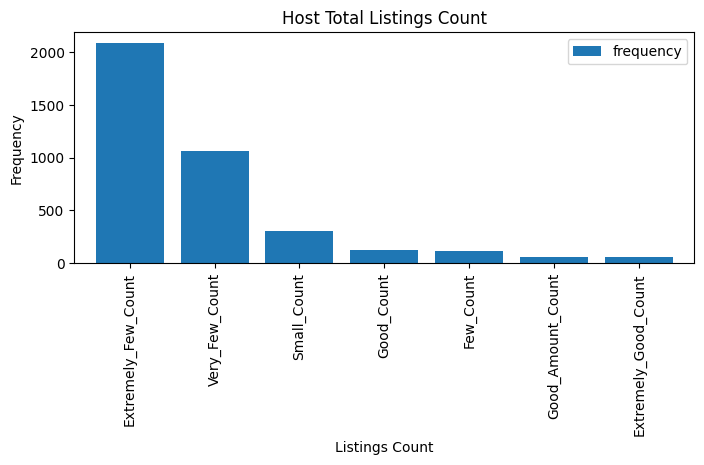

In [153]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index3.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Total Listings Count')
plt.xlabel('Listings Count')
plt.ylabel('Frequency')

In [154]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max4 = data['accommodates'].max()
min4 = data['accommodates'].min()
limites4 = [min4,max4]
limites4

[1.0, 7.0]

In [155]:
#Calculamos el rango R
r4 = max4-min4
r4

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni4 = 1+3.32*np.log10(max4)
ni4

#Calcilamos el ancho del intervao 'i'
i4 = r4/ni4
i4

ni4

3.8057254928473325

In [156]:
#Categorización de variables
intervalos4 = np.linspace(1.0,7.0,4)
intervalos4

array([1., 3., 5., 7.])

In [157]:
#Creamos las categorias
categorias4 = ['Few','Mid','Lots']

#Creamos las categorias en la columna numerica
data1['accommodates'] = pd.cut(x=data['accommodates'], bins=intervalos4, labels=categorias4)
data1['accommodates'].head(5)

,accommodates
0,Few
1,Few
2,Mid
3,Few
4,Few


In [158]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table4 = freq_tbl(data1['accommodates'])
table4

,accommodates,frequency,percentage,cumulative_perc
0,Few,2470,0.571098,0.658842
1,Mid,929,0.214798,0.906642
2,Lots,350,0.080925,1.000000


In [159]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table4_2 = table4.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro4 = table4_2[table4_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index4 = filtro4.set_index('accommodates')
filtro_index4

,frequency
accommodates,
Few,2470
Mid,929
Lots,350


Text(0, 0.5, 'Frequency')

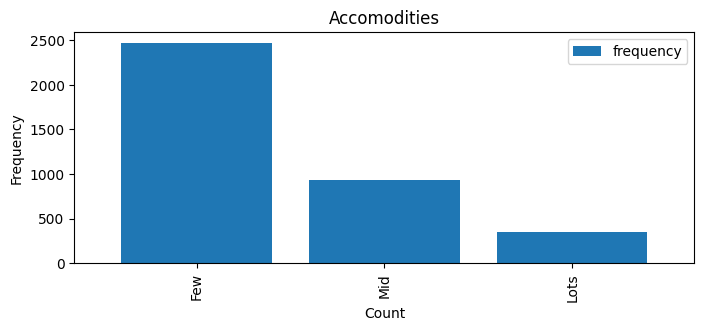

In [160]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index4.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Accomodities')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [161]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max6 = data['beds'].max()
min6 = data['beds'].min()
limites6 = [min6,max6]
limites6

[0.0, 3.0]

In [162]:
#Calculamos el rango R
r6 = max6-min6
r6

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni6 = 1+3.32*np.log10(max6)
ni6

#Calcilamos el ancho del intervao 'i'
i6 = r6/ni6
i6

ni6

2.584042565669279

In [163]:
#Categorización de variables
intervalos6 = np.linspace(0.0,3.0,3)
intervalos6

array([0. , 1.5, 3. ])

In [164]:
#Creamos las categorias
categorias6 = ['Few','Lots']

#Creamos las categorias en la columna numerica
data1['beds'] = pd.cut(x=data['beds'], bins=intervalos6, labels=categorias6)
data1['beds'].head(5)

,beds
0,Few
1,Few
2,Lots
3,Lots
4,Few


In [165]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table6 = freq_tbl(data1['beds'])
table6

,beds,frequency,percentage,cumulative_perc
0,Few,2260,0.522543,0.555283
1,Lots,1810,0.418497,1.000000


In [166]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table6_2 = table6.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro6 = table6_2[table6_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index6 = filtro6.set_index('beds')
filtro_index6

,frequency
beds,
Few,2260
Lots,1810


Text(0, 0.5, 'Frequency')

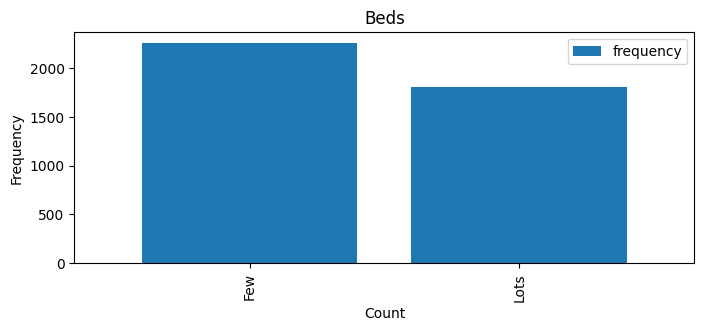

In [167]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index6.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Beds')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [168]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max7 = data['price'].max()
min7 = data['price'].min()
limites7 = [min7,max7]
limites7

[25.0, 445.0]

In [169]:
#Calculamos el rango R
r7 = max7-min7
r7

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni7 = 1+3.32*np.log10(max7)
ni7

#Calcilamos el ancho del intervao 'i'
i7 = r7/ni7
i7

ni7

9.792555236456693

In [170]:
#Categorización de variables
intervalos7 = np.linspace(25.0,445.0,10)
intervalos7

array([ 25.        ,  71.66666667, 118.33333333, 165.        ,
       211.66666667, 258.33333333, 305.        , 351.66666667,
       398.33333333, 445.        ])

In [171]:
#Creamos las categorias
categorias7 = ['Extremely_Cheap','Really_Cheap','Too_Cheap','Cheap','Economic','Expensive','Too_Expensive','Really_Expensive','Extremely_Expensive']

#Creamos las categorias en la columna numerica
data1['price'] = pd.cut(x=data['price'], bins=intervalos7, labels=categorias7)
data1['price'].head(5)

,price
0,Too_Cheap
1,Too_Cheap
2,Cheap
3,Really_Cheap
4,Too_Cheap


In [172]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table7 = freq_tbl(data1['price'])
table7

,price,frequency,percentage,cumulative_perc
0,Economic,1196,0.276532,0.276660
1,Cheap,931,0.215260,0.492019
2,Too_Cheap,557,0.128786,0.620865
3,Extremely_Cheap,477,0.110289,0.731205
4,Really_Cheap,456,0.105434,0.836687
5,Expensive,312,0.072139,0.908860
6,Too_Expensive,183,0.042312,0.951191
7,Really_Expensive,113,0.026127,0.977331
8,Extremely_Expensive,98,0.022659,1.000000


In [173]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table7_2 = table7.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro7 = table7_2[table7_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index7 = filtro7.set_index('price')
filtro_index7

,frequency
price,
Economic,1196
Cheap,931
Too_Cheap,557
Extremely_Cheap,477
Really_Cheap,456
Expensive,312
Too_Expensive,183
Really_Expensive,113
Extremely_Expensive,98


Text(0, 0.5, 'Frequency')

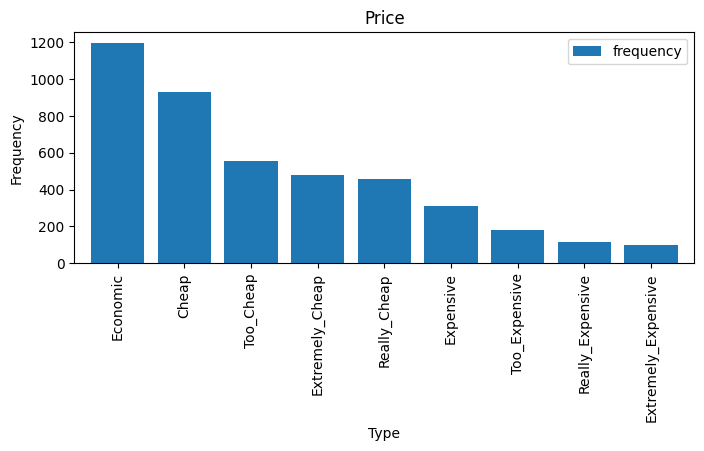

In [174]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index7.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Price')
plt.xlabel('Type')
plt.ylabel('Frequency')

In [175]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max8 = data['maximum_nights_avg_ntm'].max()
min8 = data['maximum_nights_avg_ntm'].min()
limites8 = [min8,max8]
limites8

[3.0, 1125.0]

In [176]:
#Calculamos el rango R
r8 = max8-min8
r8

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni8 = 1+3.32*np.log10(max8)
ni8

#Calcilamos el ancho del intervao 'i'
i8 = r8/ni8
i8

ni8

11.129826374525306

In [177]:
#Categorización de variables
intervalos8 = np.linspace(3.0,1125.0,11)
intervalos8

array([   3. ,  115.2,  227.4,  339.6,  451.8,  564. ,  676.2,  788.4,
        900.6, 1012.8, 1125. ])

In [178]:
#Creamos las categorias
categorias8 = ['Extremely_Few','Really_Few','Too_Few','Small_Few','Few','Lots','Big_Lots','Many_Lots','Real_Lots','Extremely_Lots']

#Creamos las categorias en la columna numerica
data1['maximum_nights_avg_ntm'] = pd.cut(x=data['maximum_nights_avg_ntm'], bins=intervalos8, labels=categorias8)
data1['maximum_nights_avg_ntm'].head(5)

,maximum_nights_avg_ntm
0,Extremely_Lots
1,Extremely_Lots
2,Big_Lots
3,Small_Few
4,Extremely_Lots


In [179]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table8 = freq_tbl(data1['maximum_nights_avg_ntm'])
table8

,maximum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Extremely_Lots,2129,0.492254,0.492482
1,Small_Few,1335,0.308671,0.801295
2,Extremely_Few,383,0.088555,0.889891
3,Really_Few,235,0.054335,0.944252
4,Big_Lots,76,0.017572,0.961832
5,Too_Few,61,0.014104,0.975943
6,Few,49,0.011329,0.987277
7,Real_Lots,34,0.007861,0.995142
8,Lots,13,0.003006,0.998149
9,Many_Lots,8,0.001850,1.000000


In [180]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table8_2 = table8.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro8 = table8_2[table8_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index8 = filtro8.set_index('maximum_nights_avg_ntm')
filtro_index8

,frequency
maximum_nights_avg_ntm,
Extremely_Lots,2129
Small_Few,1335
Extremely_Few,383
Really_Few,235
Big_Lots,76
Too_Few,61
Few,49
Real_Lots,34
Lots,13


Text(0, 0.5, 'Frequency')

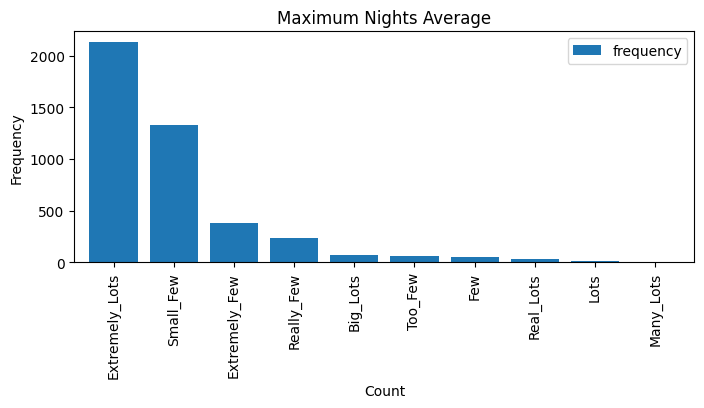

In [181]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index8.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Maximum Nights Average')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [182]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max9 = data['availability_365'].max()
min9 = data['availability_365'].min()
limites9 = [min9,max9]
limites9

[0, 365]

In [183]:
#Calculamos el rango R
r9 = max9-min9
r9

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni9 = 1+3.32*np.log10(max9)
ni9

#Calcilamos el ancho del intervao 'i'
i9 = r9/ni9
i9

ni9

9.506812309995496

In [184]:
#Categorización de variables
intervalos9 = np.linspace(0,365,9)
intervalos9

array([  0.   ,  45.625,  91.25 , 136.875, 182.5  , 228.125, 273.75 ,
       319.375, 365.   ])

In [186]:
#Creamos las categorias
categorias9 = ['Extremely_Limited_Availability','Really_Limited_Availability','Too_Limited_Availability','Limited_Availability','Wide_Availability','Mostly_Wide_Availability','Really_Wide_Availability','Extremelly_Wide_Availability']

#Creamos las categorias en la columna numerica
data1['availability_365'] = pd.cut(x=data['availability_365'], bins=intervalos9, labels=categorias9)
data1['availability_365'].head(5)

,availability_365
0,Really_Wide_Availability
1,Too_Limited_Availability
2,Really_Limited_Availability
3,Too_Limited_Availability
4,Extremelly_Wide_Availability


In [187]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table9 = freq_tbl(data1['availability_365'])
table9

,availability_365,frequency,percentage,cumulative_perc
0,Extremelly_Wide_Availability,964,0.222890,0.252687
1,Really_Wide_Availability,565,0.130636,0.400786
2,Really_Limited_Availability,456,0.105434,0.520315
3,Mostly_Wide_Availability,440,0.101734,0.635649
4,Limited_Availability,435,0.100578,0.749672
5,Wide_Availability,342,0.079075,0.839318
6,Too_Limited_Availability,320,0.073988,0.923198
7,Extremely_Limited_Availability,293,0.067746,1.000000


In [188]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table9_2 = table9.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro9 = table9_2[table9_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index9 = filtro9.set_index('availability_365')
filtro_index9

,frequency
availability_365,
Extremelly_Wide_Availability,964
Really_Wide_Availability,565
Really_Limited_Availability,456
Mostly_Wide_Availability,440
Limited_Availability,435
Wide_Availability,342
Too_Limited_Availability,320
Extremely_Limited_Availability,293


Text(0, 0.5, 'Frequency')

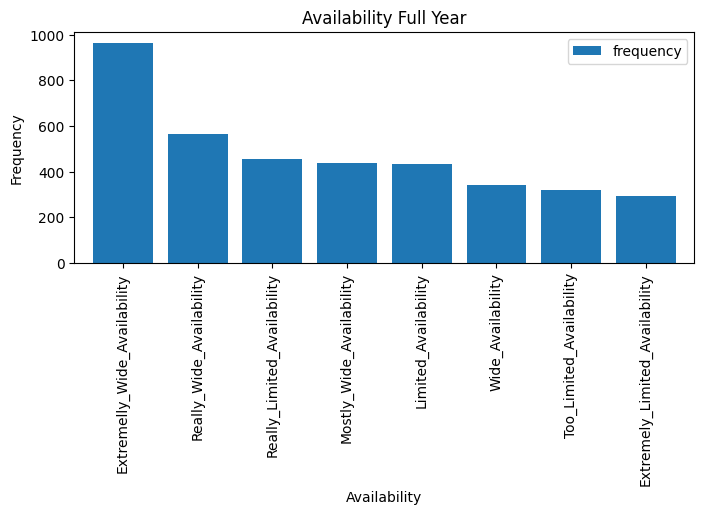

In [189]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index9.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Availability Full Year')
plt.xlabel('Availability')
plt.ylabel('Frequency')

In [190]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max10 = data['number_of_reviews'].max()
min10 = data['number_of_reviews'].min()
limites10 = [min10,max10]
limites10

[0.0, 113.0]

In [191]:
#Calculamos el rango R
r10 = max10-min10
r10

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni10 = 1+3.32*np.log10(max10)
ni10

#Calcilamos el ancho del intervao 'i'
i10 = r10/ni10
i10

ni10

7.816220432364954

In [194]:
#Categorización de variables
intervalos10 = np.linspace(0.0,113.0,8)
intervalos10

array([  0.        ,  16.14285714,  32.28571429,  48.42857143,
        64.57142857,  80.71428571,  96.85714286, 113.        ])

In [195]:
#Creamos las categorias
categorias10 = ['Very_Few','Few','Little','Neutral','Some','Quite','A_Lot']

#Creamos las categorias en la columna numerica
data1['number_of_reviews'] = pd.cut(x=data['number_of_reviews'], bins=intervalos10, labels=categorias10)
data1['number_of_reviews'].head(5)

,number_of_reviews
0,Few
1,Few
2,Few
3,Few
4,Very_Few


In [196]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table10 = freq_tbl(data1['number_of_reviews'])
table10

,number_of_reviews,frequency,percentage,cumulative_perc
0,Very_Few,1572,0.363468,0.472640
1,Few,1000,0.231214,0.773301
2,Little,242,0.055954,0.846061
3,Neutral,176,0.040694,0.898978
4,Some,133,0.030751,0.938966
5,A_Lot,102,0.023584,0.969633
6,Quite,101,0.023353,1.000000


In [197]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table10_2 = table10.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro10 = table10_2[table10_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index10 = filtro10.set_index('number_of_reviews')
filtro_index10

,frequency
number_of_reviews,
Very_Few,1572
Few,1000
Little,242
Neutral,176
Some,133
A_Lot,102
Quite,101


Text(0, 0.5, 'Frequency')

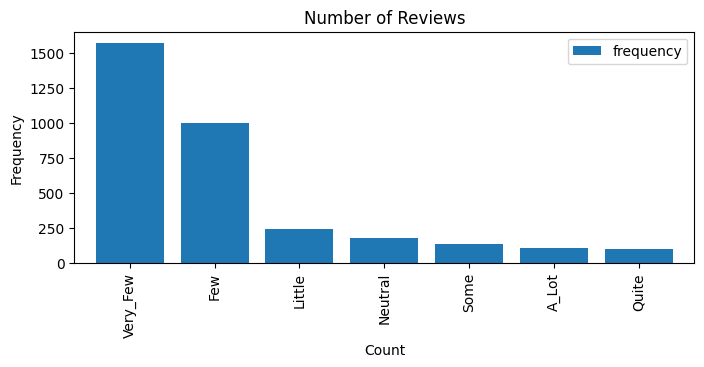

In [198]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index10.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Number of Reviews')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [199]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max11 = data['review_scores_value'].max()
min11 = data['review_scores_value'].min()
limites11 = [min11,max11]
limites11

[4.19, 5.0]

In [200]:
#Calculamos el rango R
r11 = max11-min11
r11

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni11 = 1+3.32*np.log10(max11)
ni11

#Calcilamos el ancho del intervao 'i'
i11 = r11/ni11
i11

ni11

3.3205804143955824

In [201]:
#Categorización de variables
intervalos11 = np.linspace(4.19,5.0,3)
intervalos11

array([4.19 , 4.595, 5.   ])

In [203]:
#Creamos las categorias
categorias11 = ['Bad','Great']

#Creamos las categorias en la columna numerica
data1['review_scores_value'] = pd.cut(x=data['review_scores_value'], bins=intervalos11, labels=categorias11)
data1['review_scores_value'].head(5)

,review_scores_value
0,Great
1,Great
2,Great
3,Bad
4,Great


In [205]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table11 = freq_tbl(data1['review_scores_value'])
table11

,review_scores_value,frequency,percentage,cumulative_perc
0,Great,2521,0.582890,0.583295
1,Bad,1801,0.416416,1.000000


In [206]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table11_2 = table11.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro11 = table11_2[table11_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index11 = filtro11.set_index('review_scores_value')
filtro_index11

,frequency
review_scores_value,
Great,2521
Bad,1801


Text(0, 0.5, 'Frequency')

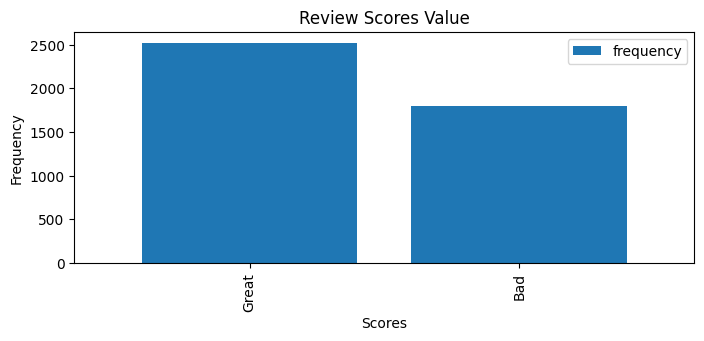

In [207]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index11.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Review Scores Value')
plt.xlabel('Scores')
plt.ylabel('Frequency')

In [208]:
#Obtenemos el limite superior y el limite inferior de la columna objetivo
max12 = data['reviews_per_month'].max()
min12 = data['reviews_per_month'].min()
limites12 = [min12,max12]
limites12

[0.01, 4.37]

In [209]:
#Calculamos el rango R
r12 = max12-min12
r12

#Calculamos el numero de intervalos de clase 'ni', aplicando la regla de Sturges
ni12 = 1+3.32*np.log10(max12)
ni12

#Calcilamos el ancho del intervao 'i'
i12 = r12/ni12
i12

ni12

3.1263983707418004

In [210]:
#Categorización de variables
intervalos12 = np.linspace(0.01,4.37,3)
intervalos12

array([0.01, 2.19, 4.37])

In [211]:
#Creamos las categorias
categorias12 = ['Few','Lots']

#Creamos las categorias en la columna numerica
data1['reviews_per_month'] = pd.cut(x=data['reviews_per_month'], bins=intervalos12, labels=categorias12)
data1['reviews_per_month'].head(5)

,reviews_per_month
0,Few
1,Few
2,Few
3,Few
4,Few


In [212]:
#Obtengo un analisis univariado de una variable categorica  en especifico
table12 = freq_tbl(data1['reviews_per_month'])
table12

,reviews_per_month,frequency,percentage,cumulative_perc
0,Few,3657,0.845549,0.851653
1,Lots,637,0.147283,1.000000


In [213]:
#Elimino las columnas 'percentage' y 'cumulative_perc' para trabajar con las frecuencias
table12_2 = table12.drop(['percentage','cumulative_perc'],axis=1)

#Se filtran los datos eliminando aquellos que no valen la pena
filtro12 = table12_2[table12_2['frequency']>0]

#Se asigna el indice a la columna de la variable
filtro_index12 = filtro12.set_index('reviews_per_month')
filtro_index12

,frequency
reviews_per_month,
Few,3657
Lots,637


Text(0, 0.5, 'Frequency')

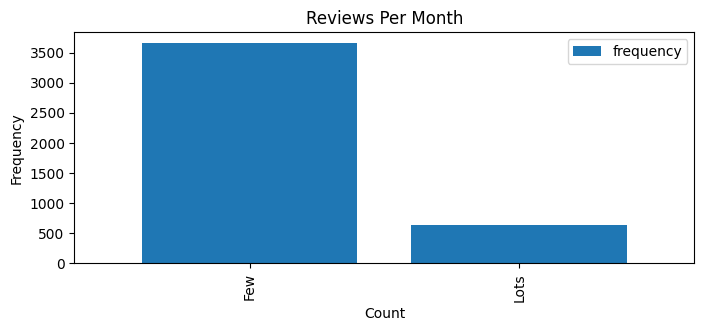

In [214]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index12.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Reviews Per Month')
plt.xlabel('Count')
plt.ylabel('Frequency')

Tomando en cuenta las gráficas obtenidas podemos realizar un análisis exhaustivo con las generadas en las otras ciudades para de esta manera alcanzar una conclusión ante los datos obtenidos.